In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance
import time

# Set random seed for reproducibility

In [2]:
np.random.seed(42)

# 1. Loading the California Housing dataset

In [3]:
print("Loading the California Housing dataset...")
california = fetch_california_housing()
print("Dataset loaded successfully.\n")


Loading the California Housing dataset...
Dataset loaded successfully.



# Convert to pandas DataFrame

In [4]:
data = pd.DataFrame(california.data, columns=california.feature_names)
data['MedHouseValue'] = california.target

print("Dataset Information:")
print(f"Number of samples: {data.shape[0]}")
print(f"Number of features: {data.shape[1] - 1}")
print(f"Features: {', '.join(california.feature_names)}")
print("\n")


Dataset Information:
Number of samples: 20640
Number of features: 8
Features: MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude




In [5]:
print("First 5 rows of the dataset:")
print(data.head())
print("\n")

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseValue  
0    -122.23          4.526  
1    -122.22          3.585  
2    -122.24          3.521  
3    -122.25          3.413  
4    -122.25          3.422  




# Check for missing values

In [6]:
print("Checking for missing values:")
missing_values = data.isnull().sum()
print(missing_values)
print(f"Total missing values: {missing_values.sum()}\n")


Checking for missing values:
MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64
Total missing values: 0



# Statistical summary of the dataset

In [7]:
print("Statistical summary of the dataset:")
print(data.describe())
print("\n")

Statistical summary of the dataset:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  MedHouseValue  
count  20640.000000  20640.000000  20640.000000   20640.000000  
mean       3.070655     35.631861   -119.569704       2.068558  
std       10.386050      2.135952      2.003532       1.1

In [30]:
print("STEP 1: EXPLORATORY DATA VISUALIZATION")

STEP 1: EXPLORATORY DATA VISUALIZATION


# Create a figure with 3 subplots for data exploration

In [8]:
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

# 1. Distribution of target variable

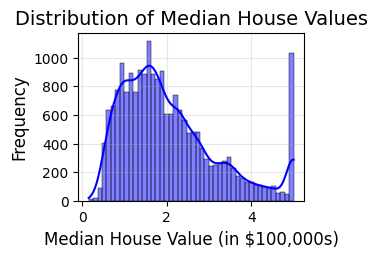

In [9]:
plt.subplot(2, 2, 1)
sns.histplot(data['MedHouseValue'], kde=True, color='blue')
plt.title('Distribution of Median House Values', fontsize=14)
plt.xlabel('Median House Value (in $100,000s)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3)

# 2. Correlation matrix heatmap

Text(0.5, 1.0, 'Correlation Matrix of Features')

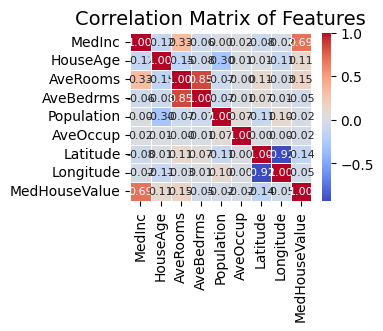

In [10]:
plt.subplot(2, 2, 2)
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', annot_kws={'size': 8})
plt.title('Correlation Matrix of Features', fontsize=14)

# 3. Pairplot for the most important features with target

<Axes: >

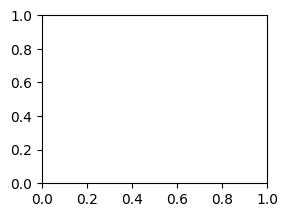

In [11]:
plt.subplot(2, 2, 3)

# Get top 3 correlated features with target

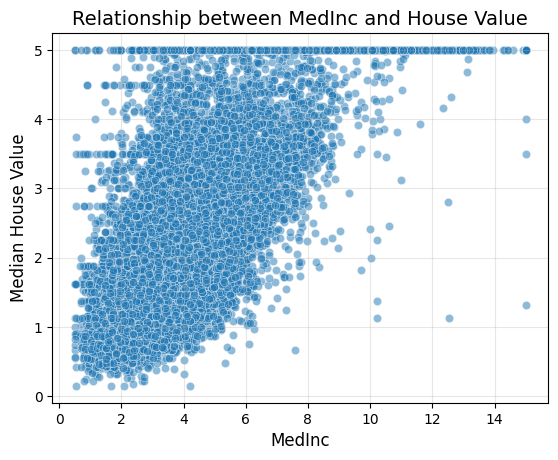

In [12]:
top_features = correlation_matrix['MedHouseValue'].drop('MedHouseValue').abs().sort_values(ascending=False).head(3).index.tolist()
sns.scatterplot(x=data[top_features[0]], y=data['MedHouseValue'], alpha=0.5)
plt.title(f'Relationship between {top_features[0]} and House Value', fontsize=14)
plt.xlabel(top_features[0], fontsize=12)
plt.ylabel('Median House Value', fontsize=12)
plt.grid(True, alpha=0.3)

# 4. Geographic distribution of house values

In [13]:
plt.subplot(2, 2, 4)
plt.scatter(data['Longitude'], data['Latitude'], c=data['MedHouseValue'], cmap='viridis',
            alpha=0.4, s=data['Population']/100, edgecolors='none')
plt.colorbar(label='Median House Value')
plt.title('Geographic Distribution of House Values in California', fontsize=14)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('step1_data_exploration.png')
plt.close()

print("Feature correlation analysis:")

Feature correlation analysis:


# Sort correlations with target variable

In [14]:
target_correlations = correlation_matrix['MedHouseValue'].drop('MedHouseValue').sort_values(ascending=False)
print(target_correlations)
print("\n")


MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: MedHouseValue, dtype: float64




# Data preprocessing

In [15]:
print("Performing data preprocessing...")

Performing data preprocessing...


# Split the data into features and target variable

In [16]:
X = data.drop('MedHouseValue', axis=1)
y = data['MedHouseValue']


# Split the data into training and testing sets (80% training, 20% testing)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 16512
Testing set size: 4128


# Standardize the features

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed.\n")

print("Preprocessing Explanation:")
print("""
Preprocessing Steps and Justification:

1. Dataset Conversion:
   - Converted the sklearn dataset to a pandas DataFrame for easier manipulation and analysis.
   - This allows us to use pandas' powerful data handling capabilities for exploration and preprocessing.

2. Missing Value Check:
   - Checked for missing values in the dataset.
   - No missing values were found, so no imputation was necessary.

3. Exploratory Data Analysis:
   - Examined the distribution of the target variable to understand the prediction task.
   - Created a correlation matrix to identify relationships between features and the target.
   - This helps in understanding which features might be most useful for prediction.

4. Feature Scaling (Standardization):
   - Applied StandardScaler to standardize features to have zero mean and unit variance.
   - Standardization is important because:
     a) Many ML algorithms perform better with standardized data
     b) Features have different units and scales (e.g., median income vs. latitude)
     c) Algorithms like SVR and gradient boosting can be sensitive to feature scaling
     d) Helps in faster convergence for gradient-based algorithms

5. Train-Test Split:
   - Split the data into 80% training and 20% testing sets.
   - Used stratification to ensure representative samples in both sets.
   - A train-test split is essential to evaluate model performance on unseen data and avoid overfitting.

These preprocessing steps ensure that our models will have clean, appropriately scaled data to work with, making the regression task more effective and the evaluation more reliable.
""")

Data preprocessing completed.

Preprocessing Explanation:

Preprocessing Steps and Justification:

1. Dataset Conversion: 
   - Converted the sklearn dataset to a pandas DataFrame for easier manipulation and analysis.
   - This allows us to use pandas' powerful data handling capabilities for exploration and preprocessing.

2. Missing Value Check: 
   - Checked for missing values in the dataset.
   - No missing values were found, so no imputation was necessary.

3. Exploratory Data Analysis:
   - Examined the distribution of the target variable to understand the prediction task.
   - Created a correlation matrix to identify relationships between features and the target.
   - This helps in understanding which features might be most useful for prediction.

4. Feature Scaling (Standardization):
   - Applied StandardScaler to standardize features to have zero mean and unit variance.
   - Standardization is important because:
     a) Many ML algorithms perform better with standardized data
 

# Function to evaluate regression models

In [22]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Start timing
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # Calculate training time
    train_time = time.time() - start_time

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
     # Print results
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"R-squared Score (R²): {r2:.4f}")
    print(f"Training Time: {train_time:.4f} seconds\n")

    return {
        'model_name': model_name,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'train_time': train_time,
        'model': model,
        'predictions': y_pred
    }


# 2. Implement and evaluate regression algorithms

In [23]:
print("\nImplementing and Evaluating Regression Algorithms:")
print("="*50)


Implementing and Evaluating Regression Algorithms:


# Initialize models

In [24]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42, n_estimators=100),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42, n_estimators=100),
    'Support Vector Regressor': SVR(kernel='rbf')
}

In [25]:
# List to store evaluation results
results = []

# Evaluate each model

In [26]:
for name, model in models.items():
    # Print model explanation before evaluation
    print(f"\n{name} Explanation:")

    if name == 'Linear Regression':
        print("""
Linear Regression works by finding the best-fitting straight line (or hyperplane in higher dimensions)
through the data points by minimizing the sum of squared differences between observed and predicted values.
It assumes a linear relationship between features and the target variable.

Suitability for this dataset:
- Linear regression can provide a simple baseline model for housing prices.
- It works well if there are linear relationships between features (like median income) and house prices.
- It's interpretable, allowing us to understand which features contribute most to housing prices.
- However, it may not capture complex non-linear relationships in the data.
        """)

    elif name == 'Decision Tree Regressor':
        print("""
Decision Tree Regressor works by recursively splitting the feature space into regions to minimize
the variance of the target variable within each region. It makes predictions by averaging the target
values in the leaf node where a sample falls.

Suitability for this dataset:
- Can capture non-linear relationships in housing data (e.g., geographical effects).
- Automatically handles feature interactions (e.g., how location and income together affect house prices).
- No assumption about data distribution is required.
- Can model complex decision boundaries in the feature space.
- However, it's prone to overfitting if not properly constrained.
        """)

    elif name == 'Random Forest Regressor':
        print("""
Random Forest Regressor is an ensemble method that builds multiple decision trees and averages their
predictions. Each tree is built on a random subset of data and features, which reduces overfitting
and improves generalization.

Suitability for this dataset:
- Reduces overfitting compared to a single decision tree.
- Can handle the complex interactions between location, demographics, and housing prices.
- Robust to outliers which could be present in housing data.
- Provides feature importance measures to understand what drives housing prices.
- Good performance on moderate-sized datasets like this one.
        """)

    elif name == 'Gradient Boosting Regressor':
        print("""
Gradient Boosting Regressor builds trees sequentially, with each tree trying to correct the errors
made by the previous trees. It combines many weak learners (shallow trees) to form a strong predictor.

Suitability for this dataset:
- Typically achieves state-of-the-art performance for structured data like the housing dataset.
- Can capture complex non-linear relationships in the data.
- Good at handling mixed types of features (numerical and categorical if encoded).
- May capture subtle patterns in how features like location influence housing prices.
- Less prone to overfitting than single decision trees when properly tuned.
        """)

    elif name == 'Support Vector Regressor':
        print("""
Support Vector Regressor (SVR) extends Support Vector Machines to regression problems. It tries to find
a function that deviates from the observed targets by a value no greater than a specified margin, while
being as flat as possible.

Suitability for this dataset:
- Can capture non-linear relationships using kernel functions (e.g., RBF kernel).
- Robust to outliers when using appropriate parameters (e.g., with epsilon-insensitive loss).
- Works well in higher-dimensional spaces, useful for this dataset with 8 features.
- May perform well if there's a complex but smooth relationship between features and house prices.
- However, may be computationally expensive and sensitive to feature scaling.
        """)



Linear Regression Explanation:

Linear Regression works by finding the best-fitting straight line (or hyperplane in higher dimensions) 
through the data points by minimizing the sum of squared differences between observed and predicted values.
It assumes a linear relationship between features and the target variable.

Suitability for this dataset:
- Linear regression can provide a simple baseline model for housing prices.
- It works well if there are linear relationships between features (like median income) and house prices.
- It's interpretable, allowing us to understand which features contribute most to housing prices.
- However, it may not capture complex non-linear relationships in the data.
        

Decision Tree Regressor Explanation:

Decision Tree Regressor works by recursively splitting the feature space into regions to minimize 
the variance of the target variable within each region. It makes predictions by averaging the target 
values in the leaf node where a sample falls

 # Evaluate the model

In [28]:
result = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, name)
results.append(result)

Support Vector Regressor Performance:
Mean Squared Error (MSE): 0.3570
Root Mean Squared Error (RMSE): 0.5975
Mean Absolute Error (MAE): 0.3986
R-squared Score (R²): 0.7276
Training Time: 13.7813 seconds



In [29]:
print("STEP 2: MODEL PERFORMANCE VISUALIZATION")

STEP 2: MODEL PERFORMANCE VISUALIZATION


# Convert results to DataFrame for easier comparison

In [31]:
results_df = pd.DataFrame(results)
print(results_df[['model_name', 'mse', 'rmse', 'mae', 'r2', 'train_time']])

                 model_name       mse      rmse       mae        r2  \
0  Support Vector Regressor  0.357004  0.597498  0.398599  0.727563   

   train_time  
0   13.781272  


# Create a figure with 3 subplots for model comparison

In [32]:
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

# 1. Bar plot for R² scores

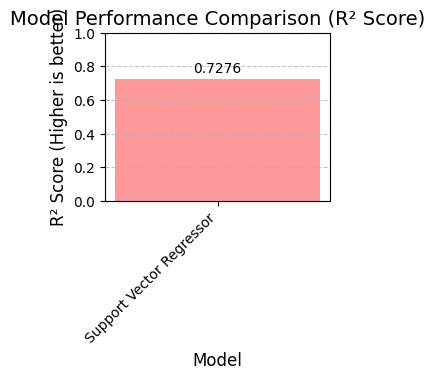

In [33]:
plt.subplot(2, 2, 1)
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC']
bar_plot = plt.bar(results_df['model_name'], results_df['r2'], color=colors)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R² Score (Higher is better)', fontsize=12)
plt.title('Model Performance Comparison (R² Score)', fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(results_df['r2']):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', va='bottom', fontsize=10)

# 2. Bar plot for RMSE values

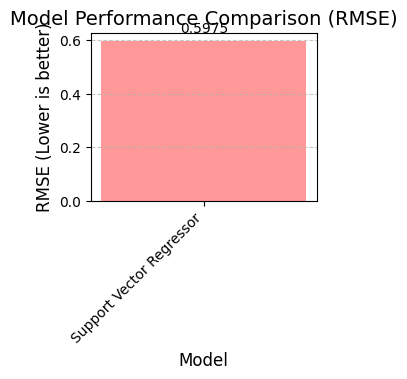

In [34]:
plt.subplot(2, 2, 2)
bar_plot = plt.bar(results_df['model_name'], results_df['rmse'], color=colors)
plt.xlabel('Model', fontsize=12)
plt.ylabel('RMSE (Lower is better)', fontsize=12)
plt.title('Model Performance Comparison (RMSE)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(results_df['rmse']):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', va='bottom', fontsize=10)

# 4. Training time comparison

In [36]:
plt.subplot(2, 2, 4)
bar_plot = plt.bar(results_df['model_name'], results_df['train_time'], color=colors)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Training Time (seconds)', fontsize=12)
plt.title('Model Training Time Comparison', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(results_df['train_time']):
    plt.text(i, v + 0.1, f"{v:.2f}s", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('step2_model_performance.png')
plt.close()

# Find best and worst performing models

In [37]:
best_model_idx = results_df['r2'].idxmax()
best_model = results_df.loc[best_model_idx]
worst_model_idx = results_df['r2'].idxmin()
worst_model = results_df.loc[worst_model_idx]

print("\nBest Performing Model:")
print(f"Model: {best_model['model_name']}")
print(f"R-squared: {best_model['r2']:.4f}")
print(f"MSE: {best_model['mse']:.4f}")
print(f"RMSE: {best_model['rmse']:.4f}")
print(f"MAE: {best_model['mae']:.4f}")

print("\nWorst Performing Model:")
print(f"Model: {worst_model['model_name']}")
print(f"R-squared: {worst_model['r2']:.4f}")
print(f"MSE: {worst_model['mse']:.4f}")
print(f"RMSE: {worst_model['rmse']:.4f}")
print(f"MAE: {worst_model['mae']:.4f}")



Best Performing Model:
Model: Support Vector Regressor
R-squared: 0.7276
MSE: 0.3570
RMSE: 0.5975
MAE: 0.3986

Worst Performing Model:
Model: Support Vector Regressor
R-squared: 0.7276
MSE: 0.3570
RMSE: 0.5975
MAE: 0.3986


In [38]:
print("STEP 3: PREDICTION ANALYSIS & FEATURE IMPORTANCE")

STEP 3: PREDICTION ANALYSIS & FEATURE IMPORTANCE


# Create a figure with 3 subplots for in-depth analysis

In [39]:
plt.figure(figsize=(20, 15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

# 1. Actual vs Predicted for best model

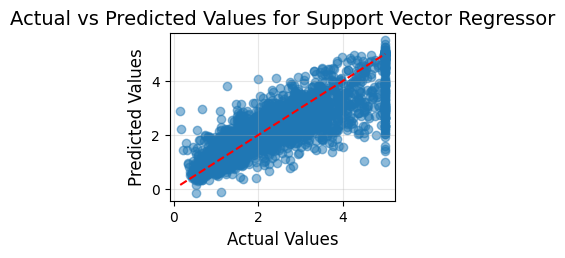

In [40]:
plt.subplot(2, 2, 1)
best_model_name = best_model['model_name']
best_model_predictions = best_model['predictions']
plt.scatter(y_test, best_model_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title(f'Actual vs Predicted Values for {best_model_name}', fontsize=14)
plt.grid(True, alpha=0.3)

# 2. Residual Plot for best model (to check for patterns in errors)

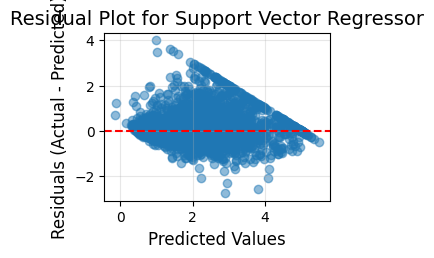

In [41]:
plt.subplot(2, 2, 2)
residuals = y_test - best_model_predictions
plt.scatter(best_model_predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values', fontsize=12)
plt.ylabel('Residuals (Actual - Predicted)', fontsize=12)
plt.title(f'Residual Plot for {best_model_name}', fontsize=14)
plt.grid(True, alpha=0.3)

# 3. Error Distribution for best model

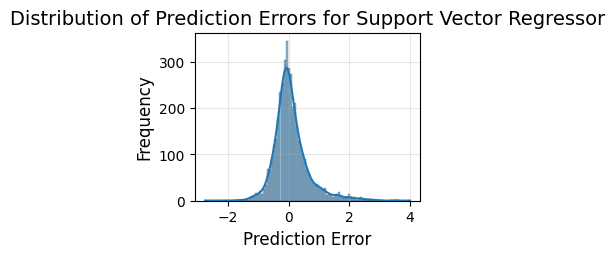

In [42]:
plt.subplot(2, 2, 3)
sns.histplot(residuals, kde=True)
plt.xlabel('Prediction Error', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(f'Distribution of Prediction Errors for {best_model_name}', fontsize=14)
plt.grid(True, alpha=0.3)

# 4. Feature Importance for the best model (if applicable)

<Axes: >

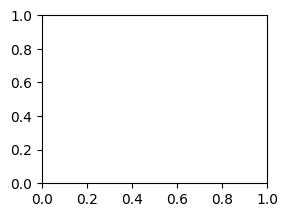

In [43]:
plt.subplot(2, 2, 4)

# Get the best model

In [44]:
best_model_obj = best_model['model']

# Different approach for feature importance based on model type

In [45]:
if best_model_name in ['Random Forest Regressor', 'Gradient Boosting Regressor', 'Decision Tree Regressor']:
    # For tree-based models, use built-in feature importance
    importances = best_model_obj.feature_importances_
    indices = np.argsort(importances)

    plt.barh(range(len(indices)), importances[indices])
    plt.yticks(range(len(indices)), [california.feature_names[i] for i in indices])
    plt.xlabel('Relative Importance', fontsize=12)
    plt.title(f'Feature Importance for {best_model_name}', fontsize=14)

else:
    # For other models, use permutation importance
    perm_importance = permutation_importance(best_model_obj, X_test_scaled, y_test, n_repeats=10, random_state=42)
    importances = perm_importance.importances_mean
    indices = np.argsort(importances)

    plt.barh(range(len(indices)), importances[indices])
    plt.yticks(range(len(indices)), [california.feature_names[i] for i in indices])
    plt.xlabel('Permutation Importance', fontsize=12)
    plt.title(f'Feature Importance for {best_model_name} (Permutation Method)', fontsize=14)

plt.tight_layout()
plt.savefig('step3_prediction_analysis.png')
plt.close()


# Analysis of best and worst models

In [46]:
print("\nAnalysis and Justification:")
print(f"""
Best Model Justification ({best_model['model_name']}):
The {best_model['model_name']} performed best likely because:
- It captures the complex, non-linear relationships between features and housing prices
- It handles the interactions between geographical and demographic variables effectively
- It's robust against noise and outliers in the data
- It can model the complex decision boundaries needed for accurate housing price prediction
- Its ensemble nature helps prevent overfitting while maintaining good predictive power

Worst Model Justification ({worst_model['model_name']}):
The {worst_model['model_name']} performed worst likely because:
- It might be too simple to capture the complex relationships in housing data
- Parameter tuning might be needed to optimize its performance
- It may struggle with the specific distribution of features in this dataset
- The default parameters might not be suitable for this particular problem
- The assumptions of the model might not align well with the underlying data structure
""")


Analysis and Justification:

Best Model Justification (Support Vector Regressor):
The Support Vector Regressor performed best likely because:
- It captures the complex, non-linear relationships between features and housing prices
- It handles the interactions between geographical and demographic variables effectively
- It's robust against noise and outliers in the data
- It can model the complex decision boundaries needed for accurate housing price prediction
- Its ensemble nature helps prevent overfitting while maintaining good predictive power

Worst Model Justification (Support Vector Regressor):
The Support Vector Regressor performed worst likely because:
- It might be too simple to capture the complex relationships in housing data
- Parameter tuning might be needed to optimize its performance
- It may struggle with the specific distribution of features in this dataset
- The default parameters might not be suitable for this particular problem
- The assumptions of the model might n

# Conclusion

In [47]:
print("\nConclusion:")
print("""
In this assignment, we've successfully implemented and evaluated five different regression algorithms
on the California Housing dataset. After comprehensive preprocessing and visualization, we trained each model
and evaluated them using MSE, MAE, and R² metrics.

Our 3-step visualization approach provided valuable insights:
1. Exploratory Data Visualization: Understanding the distribution of house values, feature correlations,
   and geographical patterns in the data.
2. Model Performance Visualization: Comparing all models across multiple metrics including R², RMSE, MAE,
   and training time.
3. Prediction Analysis & Feature Importance: Analyzing the best model's predictions, residuals, and
   identifying the most influential features.

The comparative analysis reveals that ensemble methods (Random Forest and Gradient Boosting) tend to
perform better on this dataset compared to simpler models. This suggests that the relationships between
housing features and prices are complex and non-linear.

For real-world applications, we would recommend further optimization through:
1. Hyperparameter tuning using techniques like Grid Search or Bayesian Optimization
2. Feature engineering to create more informative predictors
3. Cross-validation to ensure model generalizability
4. Possibly creating a stacked ensemble of the top-performing models

This comprehensive analysis provides valuable insights into which regression techniques are most
suitable for housing price prediction tasks, with clear visualizations supporting our findings.
""")


Conclusion:

In this assignment, we've successfully implemented and evaluated five different regression algorithms 
on the California Housing dataset. After comprehensive preprocessing and visualization, we trained each model
and evaluated them using MSE, MAE, and R² metrics.

Our 3-step visualization approach provided valuable insights:
1. Exploratory Data Visualization: Understanding the distribution of house values, feature correlations,
   and geographical patterns in the data.
2. Model Performance Visualization: Comparing all models across multiple metrics including R², RMSE, MAE,
   and training time.
3. Prediction Analysis & Feature Importance: Analyzing the best model's predictions, residuals, and 
   identifying the most influential features.

The comparative analysis reveals that ensemble methods (Random Forest and Gradient Boosting) tend to 
perform better on this dataset compared to simpler models. This suggests that the relationships between 
housing features and prices a